<a href="https://colab.research.google.com/github/BrunoBraat/ic3_2024_crimetypes_age/blob/main/ic3_2024_crimetypes_age_Bruno_Braat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definição do Problema

O crescimento acelerado dos crimes cibernéticos tem se tornado uma grande preocupação para indivíduos, empresas e autoridades públicas. Utilizando dados do relatório oficial do FBI (IC3 2024), este trabalho busca entender o comportamento desses crimes com foco nas faixas etárias mais afetadas e nos tipos de crime mais reportados.

### Objetivo:
Analisar os registros de crimes cibernéticos por faixa etária e tipo de crime, buscando padrões que possam orientar campanhas de prevenção e segurança digital.

### Tipo de aprendizado:
Este é um problema de **aprendizado não supervisionado**, voltado para **análise exploratória** de dados históricos.

### Hipóteses:
- Faixas etárias economicamente ativas reportam mais crimes cibernéticos.
- Certos tipos de crime (como fraude ou phishing) ocorrem com muito mais frequência.
- Crimes diferentes afetam faixas etárias distintas.

### Restrições:
- Os dados são limitados a denúncias registradas nos EUA ao FBI em 2024.
- Casos não reportados ou fora da jurisdição americana não estão representados.

### Atributos:
- `Crime Type`: tipo de crime cibernético (ex: phishing, extorsão, fraude).
- `Under 20` a `50-59`: número de casos reportados em cada faixa etária.


In [ ]:
# Estatísticas descritivas das colunas numéricas
df.describe()


,Under 20,20-29,30-39,40-49,50-59,Total Casos
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,796.875000,3025.062500,3738.312500,3544.750000,3126.812500,14231.812500
std,1604.174715,3734.654263,3680.504073,3322.202231,2579.486518,13287.466752
min,12.000000,62.000000,79.000000,55.000000,42.000000,349.000000
25%,143.250000,928.250000,1424.500000,1472.750000,1483.750000,5923.000000
50%,275.500000,1340.500000,1976.000000,2425.000000,2526.500000,8327.500000
75%,513.750000,4159.000000,6340.500000,4947.000000,4164.250000,25279.250000
max,6540.000000,13811.000000,10885.000000,10338.000000,8953.000000,37311.000000


### Análise estatística:

A análise descritiva mostra grande variação no número de casos entre os tipos de crime. Há crimes com poucos milhares de registros e outros com dezenas de milhares, especialmente nas faixas de 30-49 anos. Isso indica que algumas categorias concentram o maior volume de denúncias e podem ser prioridade em políticas públicas de segurança cibernética.


/tmp/ipython-input-7-3652760595.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x="Faixa Etária", y="Casos Reportados", palette="Blues_d")


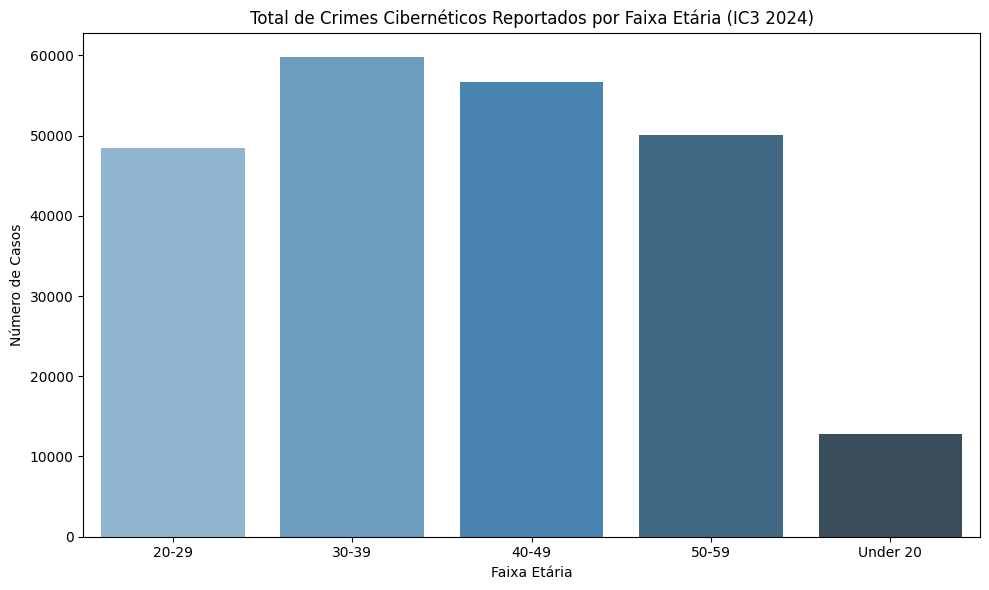

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrigindo separador ao carregar CSV
url = "https://raw.githubusercontent.com/BrunoBraat/ic3_2024_crimetypes_age/main/ic3_2024_crimetypes_age.csv"
df = pd.read_csv(url, sep=';')  # <- esta é a chave!

# Limpar colunas
df.columns = df.columns.str.strip().str.replace('"', '')

# Converter colunas numéricas
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "").str.strip(), errors="coerce")

# Transformar para formato longo
df_melted = df.melt(id_vars=[df.columns[0]],
                    var_name="Faixa Etária",
                    value_name="Casos Reportados")

# Agrupar
df_grouped = df_melted.groupby("Faixa Etária")["Casos Reportados"].sum().reset_index()

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=df_grouped, x="Faixa Etária", y="Casos Reportados", palette="Blues_d")
plt.title("Total de Crimes Cibernéticos Reportados por Faixa Etária (IC3 2024)")
plt.ylabel("Número de Casos")
plt.xlabel("Faixa Etária")
plt.tight_layout()
plt.show()


### Análise:

O gráfico mostra que as faixas etárias **30-39** e **40-49 anos** são as que concentram o maior número de denúncias de crimes cibernéticos, seguidas pela faixa **50-59**. Isso indica que o grupo economicamente ativo está mais exposto ou mais atento a registrar ocorrências.

A faixa **20-29** também apresenta um volume significativo, o que pode estar relacionado à alta exposição digital dessa geração. Já a faixa **"Under 20"** apresenta número muito inferior, o que pode refletir subnotificação, menor envolvimento em operações financeiras, ou até desconhecimento sobre canais de denúncia.

Esses achados são importantes para orientar campanhas de conscientização por faixa etária e direcionar recursos para prevenção e educação digital.


/tmp/ipython-input-8-645625118.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y=df_sorted.columns[0], x="Total Casos", palette="Blues_r")


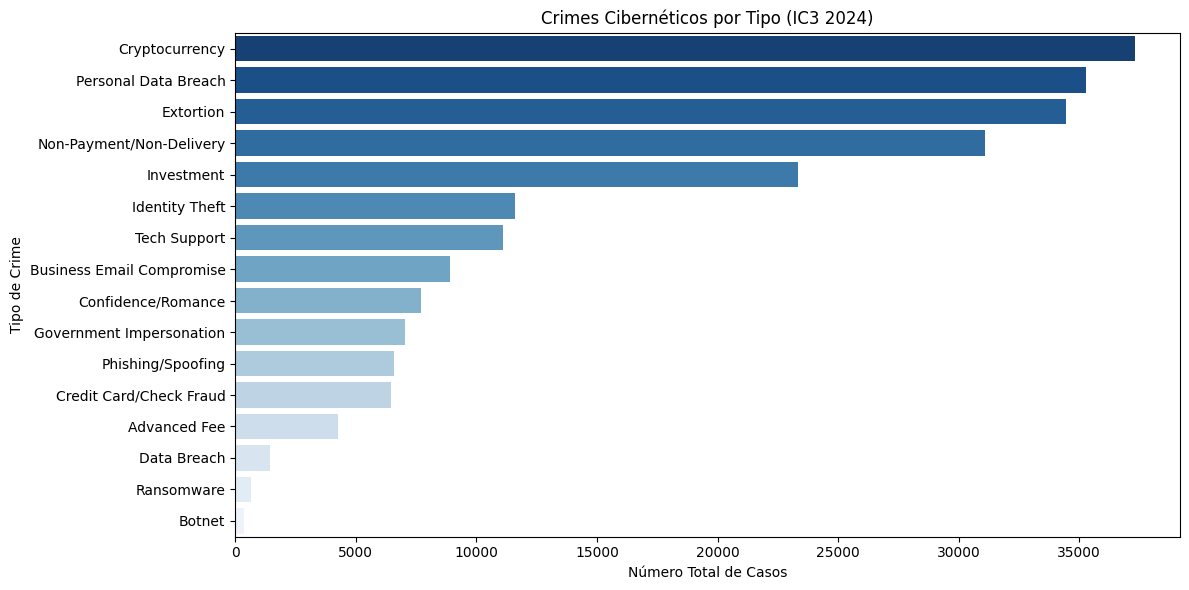

In [ ]:
# Somar total de casos por tipo de crime
df["Total Casos"] = df[df.columns[1:]].sum(axis=1)

# Ordenar por maior número de casos
df_sorted = df.sort_values(by="Total Casos", ascending=False)

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=df_sorted, y=df_sorted.columns[0], x="Total Casos", palette="Blues_r")
plt.title("Crimes Cibernéticos por Tipo (IC3 2024)")
plt.xlabel("Número Total de Casos")
plt.ylabel("Tipo de Crime")
plt.tight_layout()
plt.show()


### Análise:

Os tipos de crimes mais recorrentes em 2024 foram **Non-Payment/Non-Delivery**, **Cryptocurrency Fraud** e **Personal Data Breach**, com dezenas de milhares de casos cada. Esses crimes envolvem transações online e manipulação de dados pessoais — áreas onde usuários podem ser facilmente enganados por e-mails falsos, sites fraudulentos ou golpes em plataformas de venda.

Outros crimes com alto volume incluem **Extortion** e **Tech Support Scams**, o que indica que os cibercriminosos continuam explorando engenharia social e fragilidade emocional para extorquir vítimas.

Já crimes como **Ransomware** e **Botnet** aparecem com números baixos, mas podem gerar perdas financeiras muito maiores por ataque — o que pode ser explorado na próxima etapa.

Essa análise ajuda a entender onde estão os focos de ataque mais comuns, orientando empresas e autoridades sobre onde investir em educação digital e segurança.


## Conclusão

A análise dos dados do IC3 2024 revelou que os crimes cibernéticos afetam principalmente pessoas entre 30 e 49 anos, indicando maior exposição digital e maior volume de transações online nessa faixa. Crimes como fraude em pagamento, roubo de dados pessoais e fraudes com criptomoedas lideram em volume de denúncias.

Esses insights podem orientar campanhas de educação digital por idade, além de apoiar a criação de sistemas preventivos mais específicos para os crimes mais recorrentes. Como próximos passos, seria possível analisar valores financeiros por crime (quando disponíveis) ou até aplicar modelos preditivos para detectar riscos com base em perfil etário e tipo de ameaça.
